# NYC Green Taxi Trip Data Analysis — September 2015
---

**Developer: Patipol Sumanus**  
**Date: 27-Dec-2025**   

### Table of Contents

**1. Introduction** <br>  

*   Objectives
*   Data sources


**2. Data Preparation**  

*   Import Libraries
*   Load Data to DataFrame
*   Basic Exploration & Data cleansing

**3. Exploratory Data Analysis (EDA)**  

*   Trip Distance Distribution  
*   Airport Trip Analysis  
*   Insights & Hypotheses

**4. Feature Engineering**  
*   Tip Percentage  
*   Additional Derived Metrics  

**5. Machine Learning**  
* Model Development  
* Model Evaluation & Interpretation  

**6. Advanced Analysis (My curiosity)**  

**7. Summary**  
* Conclusion (PDF)
* Next Steps  

# **1) Project Objective: NYC Green Taxi Trip Analysis**


  This project focuses on analyzing the NYC Green Taxi trip dataset from September 2015 to uncover operational patterns, passenger behavior, and business-driven insights. The ultimate goal is to demonstrate end-to-end data science capabilities including data ingestion, visualization, feature engineering, predictive modeling, and actionable storytelling.


  **Key Insights We Aim to Achieve**
  <ul style="font-size:15px; line-height:1.6; margin:0 0 10px 18px;">
    <li>Explore trip characteristics and detect anomalies or unusual travel behaviors.</li>
    <li>Understand hourly demand and identify airport-related traffic patterns.</li>
    <li>Predict tipping percentage to analyze passenger behavior and revenue potential.</li>
    <li>Deep-dive into a selected analytical direction such as traffic distribution,
        spatial visualization, search efficiency, or anomaly detection.</li>
  </ul>

  <p style="font-size:15px; font-weight:600; color:#0e6b3a;">
    Deliverables: Clear insights, trustworthy models, and elegant communication —
    just like sharing a meaningful holiday gift to your future team.
  </p>
</div>


# **2) Data Preparation**

###### **Import Libraries**

In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
url_green_trip_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2015-09.parquet"

response = requests.get(url_green_trip_data)
open("green_tripdata_2015-09.parquet", "wb").write(response.content)

22720762

###### **Load data to Dataframe**

In [3]:
# Load into pandas
df_green = pd.read_parquet("green_tripdata_2015-09.parquet")
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2015-09-01 00:08:23,2015-09-01 00:12:46,N,1,74,42,1,1.40,6.0,0.5,0.5,0.0,0.5,None,0.3,7.8,2,1.0,None
1,2,2015-09-01 00:21:29,2015-09-01 00:25:33,N,1,256,37,1,0.74,5.0,0.5,0.5,0.0,0.0,None,0.3,6.3,2,1.0,None
2,2,2015-09-01 00:31:07,2015-09-01 00:41:08,N,1,80,36,1,2.52,10.0,0.5,0.5,0.0,0.0,None,0.3,11.3,2,1.0,None
3,2,2015-09-01 00:57:46,2015-09-01 01:05:49,N,4,191,265,1,2.80,16.0,0.5,0.5,0.0,0.0,None,0.3,17.3,2,1.0,None
4,1,2015-09-01 00:08:04,2015-09-01 00:17:30,N,1,62,71,1,2.20,9.5,0.5,0.5,0.0,0.0,None,0.3,10.8,2,1.0,None


###### **Basic Exploration**

In [4]:
df_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494927 entries, 0 to 1494926
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1494927 non-null  int64         
 1   lpep_pickup_datetime   1494927 non-null  datetime64[us]
 2   lpep_dropoff_datetime  1494927 non-null  datetime64[us]
 3   store_and_fwd_flag     1494927 non-null  object        
 4   RatecodeID             1494927 non-null  int64         
 5   PULocationID           1494927 non-null  int64         
 6   DOLocationID           1494927 non-null  int64         
 7   passenger_count        1494927 non-null  int64         
 8   trip_distance          1494927 non-null  float64       
 9   fare_amount            1494927 non-null  float64       
 10  extra                  1494927 non-null  float64       
 11  mta_tax                1494927 non-null  float64       
 12  tip_amount             14949

In [5]:
df_green.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1.494927e+06,1494927,1494927,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494927e+06,1.494923e+06
mean,1.782043e+00,2015-09-16 01:50:51.389146,2015-09-16 02:11:07.146143,1.097653e+00,1.175315e+02,1.309839e+02,1.370598e+00,2.968138e+00,1.254319e+01,3.512791e-01,4.866412e-01,1.235726e+00,1.231046e-01,2.920993e-01,1.503214e+01,1.540560e+00,1.022353e+00
min,1.000000e+00,2015-09-01 00:00:00,2015-09-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,2015-09-08 19:19:58,2015-09-08 19:34:57,1.000000e+00,5.200000e+01,6.500000e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,2015-09-16 03:49:11,2015-09-16 04:21:22,1.000000e+00,9.300000e+01,1.290000e+02,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,2015-09-23 12:36:10.500000,2015-09-23 12:55:47,1.000000e+00,1.810000e+02,1.950000e+02,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,2015-09-30 23:59:58,2015-10-01 23:56:10,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00
std,4.128582e-01,NaN,NaN,6.359435e-01,7.772873e+01,7.727243e+01,1.039426e+00,3.076621e+00,1.008278e+01,3.663094e-01,8.504377e-02,2.431475e+00,8.910134e-01,5.073952e-02,1.155315e+01,5.232934e-01,1.478288e-01


In [6]:
df_green.isna().sum()
df_green.isnull().mean()*100

,0
VendorID,0.000000
lpep_pickup_datetime,0.000000
lpep_dropoff_datetime,0.000000
store_and_fwd_flag,0.000000
RatecodeID,0.000000
PULocationID,0.000000
DOLocationID,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000000


In [7]:
rows, cols = df_green.shape
print(f"Shape: {df_green.shape}")
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Shape: (1494927, 20)
Number of rows: 1494927
Number of columns: 20


###### **Data Cleansing**

In [8]:
df_green_clean = df_green.copy()
cols_to_drop = ['ehail_fee', 'congestion_surcharge']
df_green_clean.drop(columns=cols_to_drop, inplace=True)

In [9]:
category_cols = [
    'VendorID', 'RatecodeID', 'payment_type',
    'store_and_fwd_flag', 'trip_type'
]
for col in category_cols:
    if col in df_green_clean.columns:
        df_green_clean[col] = df_green_clean[col].astype('category')

In [10]:
# Replace bad passenger_count values (0 or too high) → set to NaN for now
df_green_clean.loc[(df_green_clean['passenger_count'] == 0) |
             (df_green_clean['passenger_count'] > 6), 'passenger_count'] = np.nan

In [11]:
df_green_clean['passenger_count'] = df_green_clean['passenger_count'].astype('Int64')

# Ensure datetime type is correct
df_green_clean['lpep_pickup_datetime'] = pd.to_datetime(df_green_clean['lpep_pickup_datetime'], errors='coerce')
df_green_clean['lpep_dropoff_datetime'] = pd.to_datetime(df_green_clean['lpep_dropoff_datetime'], errors='coerce')

df_green_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494927 entries, 0 to 1494926
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1494927 non-null  category      
 1   lpep_pickup_datetime   1494927 non-null  datetime64[us]
 2   lpep_dropoff_datetime  1494927 non-null  datetime64[us]
 3   store_and_fwd_flag     1494927 non-null  category      
 4   RatecodeID             1494927 non-null  category      
 5   PULocationID           1494927 non-null  int64         
 6   DOLocationID           1494927 non-null  int64         
 7   passenger_count        1494426 non-null  Int64         
 8   trip_distance          1494927 non-null  float64       
 9   fare_amount            1494927 non-null  float64       
 10  extra                  1494927 non-null  float64       
 11  mta_tax                1494927 non-null  float64       
 12  tip_amount             14949

# **3) Exploratory Data Analysis (EDA)**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setup Theme
sns.set_style("whitegrid")
plt.rcParams['axes.edgecolor'] = '#2c3e50'
plt.rcParams['axes.labelcolor'] = '#0e6b3a'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.color'] = '#b3001b'
plt.rcParams['ytick.color'] = '#b3001b'
palette_christmas = ['#b3001b', '#0e6b3a', '#d4af37']


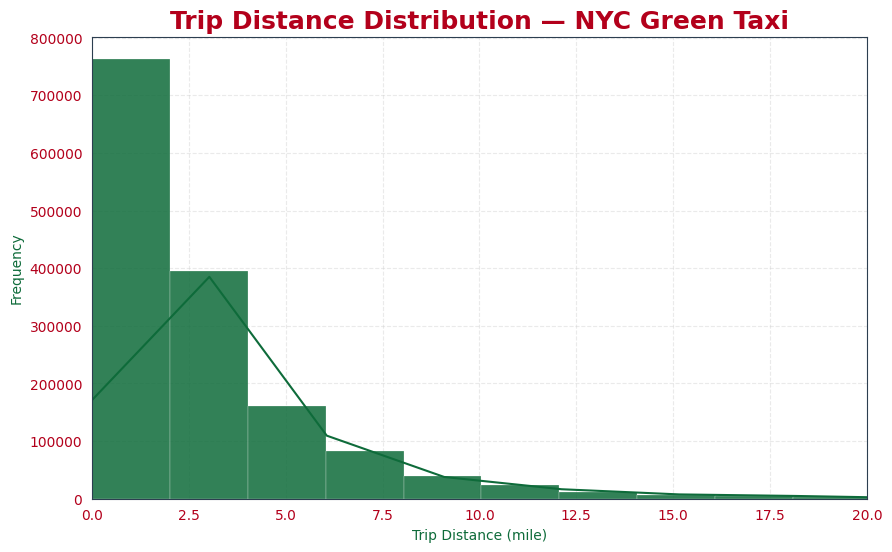

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df_green_clean['trip_distance'], bins=300, kde=True,
             color=palette_christmas[1], alpha=0.85)

plt.title("Trip Distance Distribution — NYC Green Taxi", color='#b3001b', fontsize=18, weight='bold')
plt.xlabel("Trip Distance (mile)")
plt.ylabel("Frequency")
plt.xlim(0, 20)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


#### **Right-skewed distribution of NYC Green Taxi trip distances:**
* Most trips are very short, concentrated between 0–2.5 miles, with the highest frequency around 750,000 trips.
* Long-distance trips are rare but likely represent airport or outer-borough travel.
* A small number of near-zero distance trips may indicate data entry issues or extremely short rides.
* This pattern aligns with Green Taxi regulations, which focus on local transportation outside central Manhattan.

<br>

#### **Hypotheses (Why It Happens)**

* Green Taxis mainly serve local mobility in outer boroughs

* Long-distance rides likely linked to airport travel

* Some values may come from data quality issues (such as meter logging)
* **A small portion of trips suggest possible regulation deviations**
<br>

#### **Key insight** <br>
*  Green Taxi rides are **predominantly short-distance**, which aligns with their service areas outside Manhattan. **Longer trips (10–20 miles) likely represent airport or inter-borough rides.**

In [14]:
import pandas as pd

zone_lookup_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"
zones_df = pd.read_csv(zone_lookup_url)

zones_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [15]:
df_zone = df_green_clean.merge(
    zones_df[['LocationID','Borough','Zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'Borough':'PU_Borough','Zone':'PU_Zone'})

df_zone = df_zone.merge(
    zones_df[['LocationID','Borough','Zone']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'Borough':'DO_Borough','Zone':'DO_Zone'})

# Drop redundant LocationID columns
df_zone.drop(columns=['LocationID_x','LocationID_y'], inplace=True)

df_zone.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone
0,2,2015-09-01 00:08:23,2015-09-01 00:12:46,N,1,74,42,1,1.40,6.0,...,0.0,0.5,0.3,7.8,2,1.0,Manhattan,East Harlem North,Manhattan,Central Harlem North
1,2,2015-09-01 00:21:29,2015-09-01 00:25:33,N,1,256,37,1,0.74,5.0,...,0.0,0.0,0.3,6.3,2,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Bushwick South
2,2,2015-09-01 00:31:07,2015-09-01 00:41:08,N,1,80,36,1,2.52,10.0,...,0.0,0.0,0.3,11.3,2,1.0,Brooklyn,East Williamsburg,Brooklyn,Bushwick North
3,2,2015-09-01 00:57:46,2015-09-01 01:05:49,N,4,191,265,1,2.80,16.0,...,0.0,0.0,0.3,17.3,2,1.0,Queens,Queens Village,NaN,Outside of NYC
4,1,2015-09-01 00:08:04,2015-09-01 00:17:30,N,1,62,71,1,2.20,9.5,...,0.0,0.0,0.3,10.8,2,1.0,Brooklyn,Crown Heights South,Brooklyn,East Flatbush/Farragut


In [16]:
manhattan_core_zones = [
    "Midtown North", "Midtown South", "Times Sq/Theatre District",
    "Upper East Side North", "Upper East Side South",
    "Upper West Side North", "Upper West Side South",
    "Chelsea", "Gramercy", "SoHo", "Tribeca",
    "Financial District North", "Financial District South"
]


In [17]:
df_zone

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,PU_Borough,PU_Zone,DO_Borough,DO_Zone
0,2,2015-09-01 00:08:23,2015-09-01 00:12:46,N,1,74,42,1,1.40,6.0,...,0.00,0.5,0.3,7.80,2,1.0,Manhattan,East Harlem North,Manhattan,Central Harlem North
1,2,2015-09-01 00:21:29,2015-09-01 00:25:33,N,1,256,37,1,0.74,5.0,...,0.00,0.0,0.3,6.30,2,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Bushwick South
2,2,2015-09-01 00:31:07,2015-09-01 00:41:08,N,1,80,36,1,2.52,10.0,...,0.00,0.0,0.3,11.30,2,1.0,Brooklyn,East Williamsburg,Brooklyn,Bushwick North
3,2,2015-09-01 00:57:46,2015-09-01 01:05:49,N,4,191,265,1,2.80,16.0,...,0.00,0.0,0.3,17.30,2,1.0,Queens,Queens Village,NaN,Outside of NYC
4,1,2015-09-01 00:08:04,2015-09-01 00:17:30,N,1,62,71,1,2.20,9.5,...,0.00,0.0,0.3,10.80,2,1.0,Brooklyn,Crown Heights South,Brooklyn,East Flatbush/Farragut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494922,2,2015-09-30 23:26:49,2015-09-30 23:35:47,N,1,34,80,1,1.99,9.0,...,2.06,0.0,0.3,12.36,1,1.0,Brooklyn,Brooklyn Navy Yard,Brooklyn,East Williamsburg
1494923,2,2015-09-30 23:43:55,2015-10-01 00:20:26,N,1,40,163,1,6.96,28.0,...,5.86,0.0,0.3,35.16,1,1.0,Brooklyn,Carroll Gardens,Manhattan,Midtown North
1494924,2,2015-09-30 23:29:47,2015-09-30 23:40:52,N,1,74,127,1,4.68,15.5,...,0.00,0.0,0.3,16.80,1,1.0,Manhattan,East Harlem North,Manhattan,Inwood
1494925,2,2015-09-30 23:35:01,2015-09-30 23:41:46,N,1,247,159,1,1.24,6.5,...,0.00,0.0,0.3,7.80,1,1.0,Bronx,West Concourse,Bronx,Melrose South


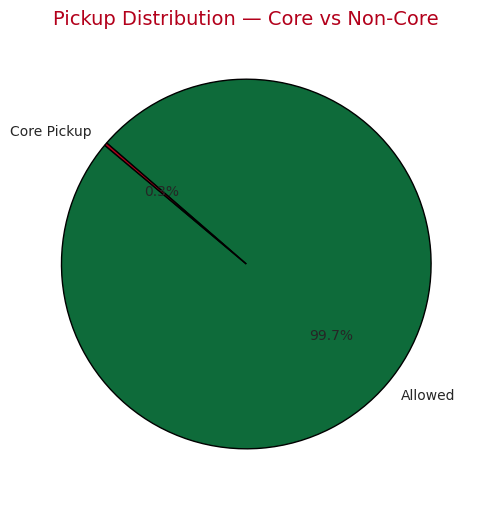

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
palette_christmas = ['#0e6b3a', '#b3001b']  # green, red

df_zone['pickup_in_core'] = df_zone['PU_Zone'].isin(manhattan_core_zones)

violations_core = df_zone[df_zone['pickup_in_core']]

violation_counts = df_zone['pickup_in_core'].value_counts().rename(index={False: 'Allowed', True: 'Core Pickup'})

plt.figure(figsize=(6,6))
plt.pie(violation_counts.values,
        labels=violation_counts.index,
        autopct='%1.1f%%',
        colors=palette_christmas,
        startangle=140,
        wedgeprops={'edgecolor':'black'})

plt.title("Pickup Distribution — Core vs Non-Core", fontsize=14, color='#b3001b')
plt.show()


### **Business Insight from EDA (Distribution analysis)**

#### **Most pickups occur outside the Manhattan core, aligning with Green Taxi regulations.**

* A small number of trips originate inside the core area. These trips may represent:
* Special exceptions
* Misclassification of zones

Potential rule violations Further investigation is recommended.

### **Further EDA related Question2**

In [19]:
df_green_clean['pickup_hour'] = df_green_clean['lpep_pickup_datetime'].dt.hour

hourly_dist_stats = (
    df_green_clean.groupby('pickup_hour')['trip_distance']
    .agg(['mean', 'median', 'count'])
    .reset_index()
)

display(hourly_dist_stats)

,pickup_hour,mean,median,count
0,0,3.115276,2.20,67158
1,1,3.017347,2.12,53773
2,2,3.046176,2.14,41196
3,3,3.212945,2.20,31640
4,4,3.526555,2.36,26424
5,5,4.133474,2.90,16700
6,6,4.055149,2.84,22667
7,7,3.284394,2.17,41978
8,8,3.048450,1.98,58965
9,9,2.999105,1.96,62027


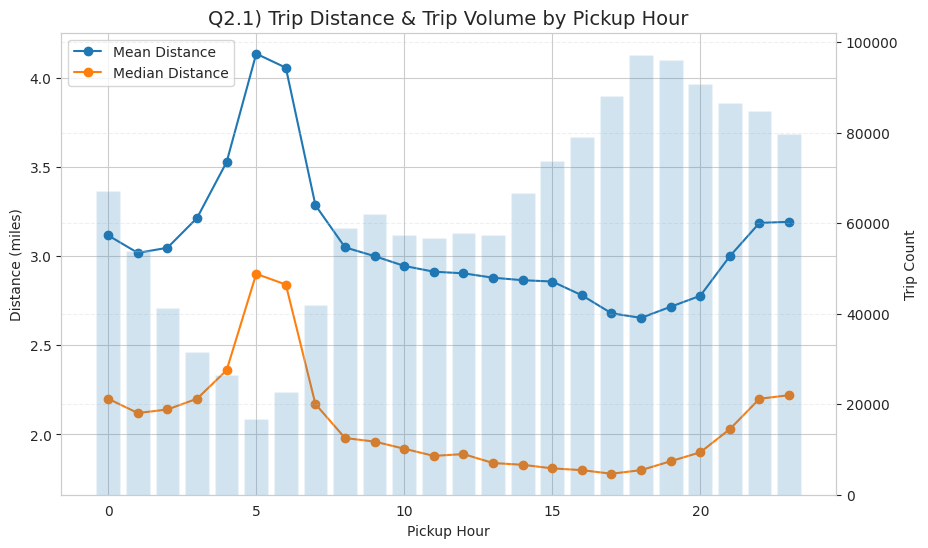

In [20]:
hour_stats = df_green_clean.groupby('pickup_hour')['trip_distance'] \
    .agg(['mean','median','count']).reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(hour_stats['pickup_hour'], hour_stats['mean'], label='Mean Distance', marker='o')
ax1.plot(hour_stats['pickup_hour'], hour_stats['median'], label='Median Distance', marker='o')
ax2.bar(hour_stats['pickup_hour'], hour_stats['count'], alpha=0.2, label='Trip Count')

ax1.set_title("Q2.1) Trip Distance & Trip Volume by Pickup Hour")
ax1.set_xlabel("Pickup Hour")
ax1.set_ylabel("Distance (miles)")
ax2.set_ylabel("Trip Count")

ax1.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


#### **Trip Distance by Hour of Day**
* Early morning: long-distance, low volume

* Midday: short-distance, high volume

* Evening: high volume, increasing distance

#### **Key driver: time-of-day effect**


* High trip volume does not necessarily correspond to long trip distances; time of day plays a critical role in travel behavior.

**Criteria: pickup OR drop-off at airport zone**

Airports: JFK, LGA, EWR

Method: location-based classification

In [21]:
airport_zones = [1, 132, 138]

df_green_clean['is_airport_trip'] = (
    df_green_clean['PULocationID'].isin(airport_zones) |
    df_green_clean['DOLocationID'].isin(airport_zones)
)

In [22]:
airport_summary = (
    df_green_clean
    .groupby('is_airport_trip')
    .agg(
        trip_count=('trip_distance', 'count'),
        avg_fare=('fare_amount', 'mean'),
        avg_distance=('trip_distance', 'mean'),
        median_distance=('trip_distance', 'median')
    )
    .reset_index()
)

airport_summary['trip_type'] = airport_summary['is_airport_trip'] \
    .map({True: 'Airport Trip', False: 'Non-Airport Trip'})

airport_summary

,is_airport_trip,trip_count,avg_fare,avg_distance,median_distance,trip_type
0,False,1459357,12.122852,2.812146,1.91,Non-Airport Trip
1,True,35570,29.788811,9.368160,8.27,Airport Trip


In [23]:
df_green_clean['airport_type'] = 'Non-Airport'
df_green_clean.loc[df_green_clean['PULocationID'].isin(airport_zones), 'airport_type'] = 'Pickup Airport'
df_green_clean.loc[df_green_clean['DOLocationID'].isin(airport_zones), 'airport_type'] = 'Dropoff Airport'


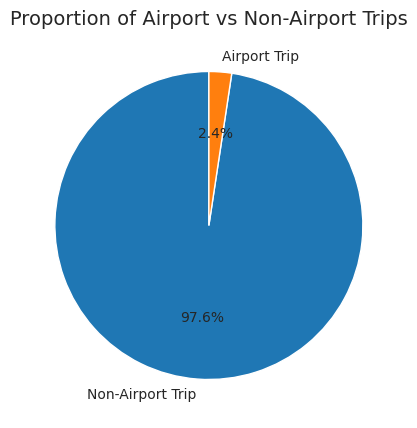

In [24]:
trip_share = df_green_clean['is_airport_trip'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    trip_share,
    labels=['Non-Airport Trip', 'Airport Trip'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Proportion of Airport vs Non-Airport Trips")
plt.show()

**Transaction Volume**

* Airport trips: low volume

* Non-airport trips: high volume

In [25]:
airport_summary = (
    df_green_clean
    .groupby('is_airport_trip')
    .agg(
        trip_count=('trip_distance', 'count'),
        avg_distance=('trip_distance', 'mean'),
        median_distance=('trip_distance', 'median'),
        avg_fare=('fare_amount', 'mean')
    )
    .reset_index()
)

airport_summary['trip_type'] = airport_summary['is_airport_trip'] \
    .map({True: 'Airport Trip', False: 'Non-Airport Trip'})

airport_summary

,is_airport_trip,trip_count,avg_distance,median_distance,avg_fare,trip_type
0,False,1459357,2.812146,1.91,12.122852,Non-Airport Trip
1,True,35570,9.368160,8.27,29.788811,Airport Trip


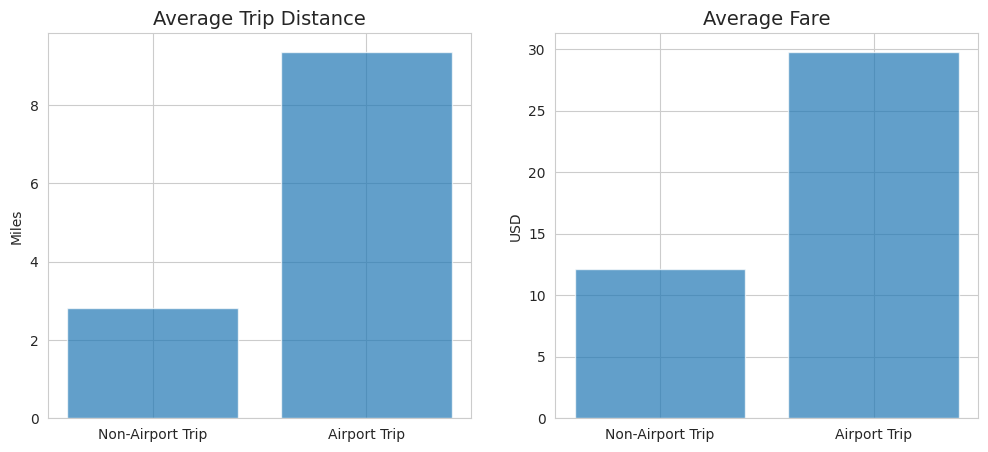

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].bar(
    airport_summary['trip_type'],
    airport_summary['avg_distance'],
    alpha=0.7
)
axes[0].set_title("Average Trip Distance")
axes[0].set_ylabel("Miles")

axes[1].bar(
    airport_summary['trip_type'],
    airport_summary['avg_fare'],
    alpha=0.7
)
axes[1].set_title("Average Fare")
axes[1].set_ylabel("USD")

plt.show()

**Distance & Fare**

* Airport trips: longer distance, higher average fare

* Non-airport trips: shorter distance, lower fare

In [27]:
df_fare_eff = df_green_clean[
    (df_green_clean['trip_distance'] > 0) &
    (df_green_clean['fare_amount'] > 0)
].copy()

df_fare_eff['fare_per_mile'] = (
    df_fare_eff['fare_amount'] / df_fare_eff['trip_distance']
)

fare_efficiency = (
    df_fare_eff
    .groupby('is_airport_trip')['fare_per_mile']
    .mean()
    .reset_index()
)

fare_efficiency['trip_type'] = fare_efficiency['is_airport_trip'] \
    .map({True: 'Airport Trip', False: 'Non-Airport Trip'})

fare_efficiency

,is_airport_trip,fare_per_mile,trip_type
0,False,7.880814,Non-Airport Trip
1,True,7.070404,Airport Trip


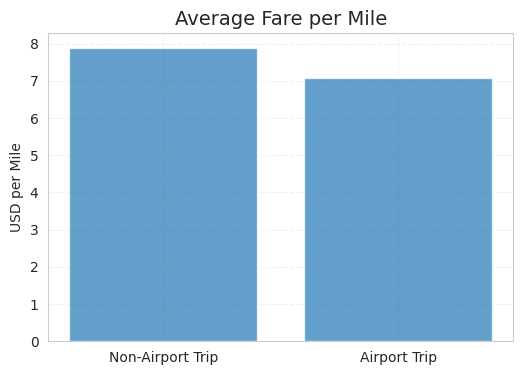

In [28]:
plt.figure(figsize=(6,4))
plt.bar(
    fare_efficiency['trip_type'],
    fare_efficiency['fare_per_mile'],
    alpha=0.7
)
plt.title("Average Fare per Mile")
plt.ylabel("USD per Mile")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Fare Efficiency**

* Airport trips: lower fare per mile

* Driver: This suggests airport trips are more distance-driven rather than congestion-driven, likely benefiting from highway travel and fewer stops.

**Key takeaway:**

* Airport trips are more cost-efficient per mile, even though they generate higher total fares.

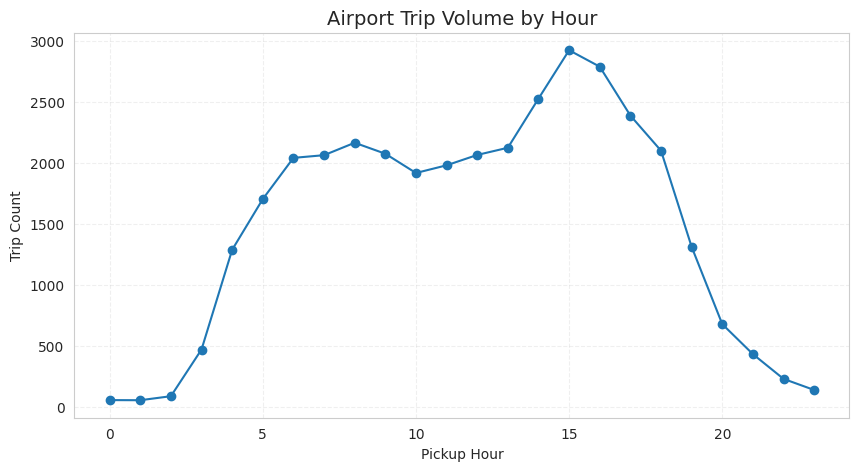

In [29]:
airport_hour = (
    df_green_clean[df_green_clean['is_airport_trip']]
    .groupby('pickup_hour')
    .size()
    .reset_index(name='trip_count')
)

plt.figure(figsize=(10,5))
plt.plot(
    airport_hour['pickup_hour'],
    airport_hour['trip_count'],
    marker='o'
)
plt.title("Airport Trip Volume by Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Trip Count")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Temporal Patterns of Airport Trips**

* Airport trip volume peaks during early morning and evening hours.

* These patterns align well with typical flight departure and arrival schedules.

**Key takeaway:**

* Airport trips follow predictable, schedule-driven demand patterns.

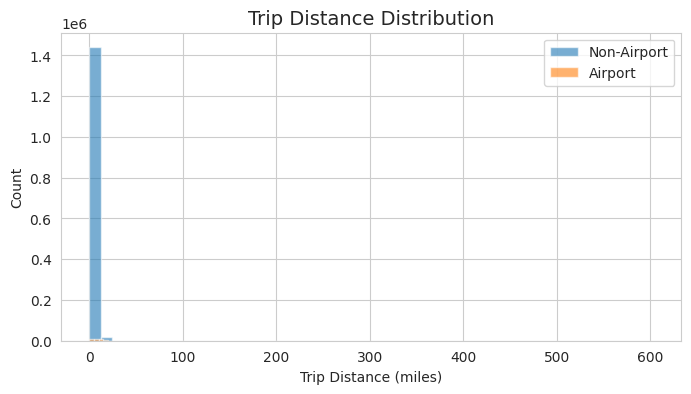

In [30]:
plt.figure(figsize=(8,4))
plt.hist(df_green_clean[~df_green_clean['is_airport_trip']]['trip_distance'], bins=50, alpha=0.6, label='Non-Airport')
plt.hist(df_green_clean[df_green_clean['is_airport_trip']]['trip_distance'], bins=50, alpha=0.6, label='Airport')
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Count")
plt.title("Trip Distance Distribution")
plt.legend()
plt.show()

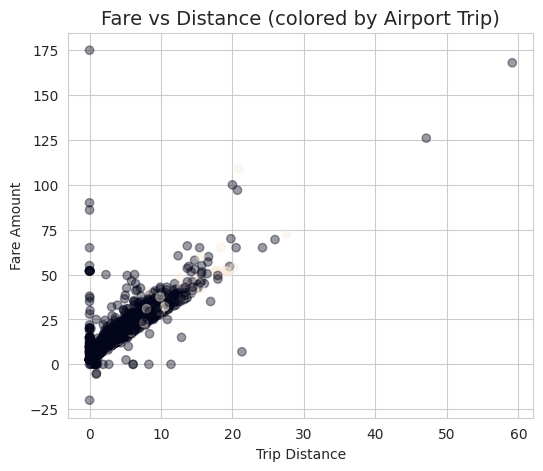

In [31]:
sample = df_green_clean.sample(min(5000, len(df_green_clean)), random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(sample['trip_distance'], sample['fare_amount'],
            c=sample['is_airport_trip'], alpha=0.4)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Fare vs Distance (colored by Airport Trip)")
plt.show()

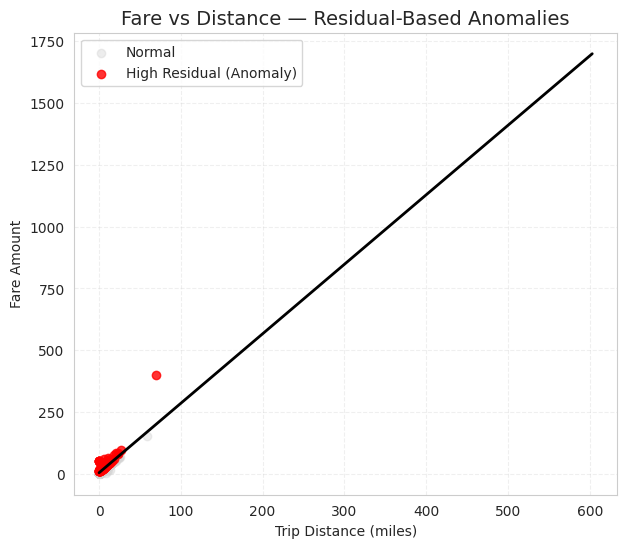

In [32]:
df_reg = df_green_clean[
    (df_green_clean['trip_distance'] > 0) &
    (df_green_clean['fare_amount'] > 0)
].copy()

X = df_reg['trip_distance'].values
y = df_reg['fare_amount'].values

coef = np.polyfit(X, y, 1)
reg_line = np.poly1d(coef)

df_reg['expected_fare'] = reg_line(X)
df_reg['residual'] = y - df_reg['expected_fare']
coef = np.polyfit(X, y, 1)
reg_line = np.poly1d(coef)

df_reg['expected_fare'] = reg_line(X)
df_reg['residual'] = y - df_reg['expected_fare']

sample = df_reg.sample(min(5000, len(df_reg)), random_state=42)


# Threshold: top 5% residuals
threshold = df_reg['residual'].quantile(0.95)

df_reg['residual_anomaly'] = df_reg['residual'] > threshold

sample = df_reg.sample(min(5000, len(df_reg)), random_state=42)

plt.figure(figsize=(7,6))

# Normal trips
plt.scatter(
    sample[~sample['residual_anomaly']]['trip_distance'],
    sample[~sample['residual_anomaly']]['fare_amount'],
    color='lightgrey',
    alpha=0.4,
    label='Normal'
)

# Residual anomalies
plt.scatter(
    sample[sample['residual_anomaly']]['trip_distance'],
    sample[sample['residual_anomaly']]['fare_amount'],
    color='red',
    alpha=0.8,
    label='High Residual (Anomaly)'
)

x_sorted = np.sort(X)

# Regression line
plt.plot(
    x_sorted,
    reg_line(x_sorted),
    color='black',
    linewidth=2
)

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")
plt.title("Fare vs Distance — Residual-Based Anomalies")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#### **Finding Anomaly Pattern**

In [33]:
# Residual percentage (normalize by expected fare)
df_reg['residual_pct'] = df_reg['residual'] / df_reg['expected_fare']

# Absolute residual (distance from pricing logic)
df_reg['abs_residual'] = df_reg['residual'].abs()

##### **1) High above line → Overcharging / Fraud**

In [34]:
top5_overcharge = (
    df_reg
    .sort_values('residual', ascending=False)
    .head(5)[
        ['trip_distance', 'fare_amount', 'expected_fare',
         'residual', 'residual_pct']
    ]
)

top5_overcharge

,trip_distance,fare_amount,expected_fare,residual,residual_pct
561065,1.18,580.5,7.440810,573.059190,77.015696
1022734,0.83,475.0,6.456933,468.543067,72.564334
1395759,0.09,450.0,4.376736,445.623264,101.816340
435046,16.78,450.0,51.293615,398.706385,7.773022
383703,0.03,400.0,4.208072,395.791928,94.055417


**2) Far below line → Undercharging / Leakage**

In [35]:
top5_undercharge = (
    df_reg
    .sort_values('residual', ascending=True)
    .head(5)[
        ['trip_distance', 'fare_amount', 'expected_fare',
         'residual', 'residual_pct']
    ]
)

top5_undercharge

,trip_distance,fare_amount,expected_fare,residual,residual_pct
1320349,603.10,1.25,1699.484407,-1698.234407,-0.999264
477111,246.28,300.00,696.435835,-396.435835,-0.569235
1432183,112.60,20.00,320.651034,-300.651034,-0.937627
1459030,108.50,18.00,309.125617,-291.125617,-0.941771
932837,98.51,1.00,281.042956,-280.042956,-0.996442


**3) Short distance + High fare → Highest-Risk Anomaly**

In [36]:
short_dist_cutoff = df_reg['trip_distance'].quantile(0.25)
high_residual_cutoff = df_reg['residual'].quantile(0.95)

top5_short_high = (
    df_reg[
        (df_reg['trip_distance'] <= short_dist_cutoff) &
        (df_reg['residual'] >= high_residual_cutoff)
    ]
    .sort_values('residual', ascending=False)
    .head(5)[
        ['trip_distance', 'fare_amount', 'expected_fare',
         'residual', 'residual_pct']
    ]
)

top5_short_high

,trip_distance,fare_amount,expected_fare,residual,residual_pct
1022734,0.83,475.0,6.456933,468.543067,72.564334
1395759,0.09,450.0,4.376736,445.623264,101.816340
383703,0.03,400.0,4.208072,395.791928,94.055417
1476095,0.06,400.0,4.292404,395.707596,92.187875
16409,0.06,400.0,4.292404,395.707596,92.187875


**Pricing Pattern Distribution (All Trips)**

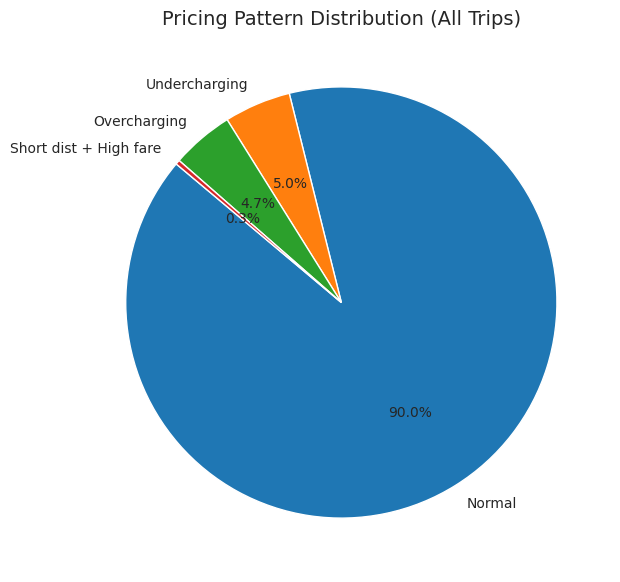

In [37]:
df_reg['abs_residual'] = df_reg['residual'].abs()
df_pie = df_reg.copy()

# thresholds (quantile-based)
high_res = df_pie['residual'].quantile(0.95)
low_res = df_pie['residual'].quantile(0.05)
short_dist = df_pie['trip_distance'].quantile(0.25)
tight_band = df_pie['abs_residual'].quantile(0.10)

def pricing_bucket(row):
    if row['residual'] >= high_res and row['trip_distance'] <= short_dist:
        return 'Short dist + High fare'
    elif row['residual'] >= high_res:
        return 'Overcharging'
    elif row['residual'] <= low_res:
        return 'Undercharging'
    elif row['abs_residual'] <= tight_band:
        return 'Normal'
    else:
        return 'Normal'

df_pie['pricing_pattern'] = df_pie.apply(pricing_bucket, axis=1)
pattern_counts = df_pie['pricing_pattern'].value_counts()
pattern_counts
plt.figure(figsize=(7,7))

plt.pie(
    pattern_counts,
    labels=pattern_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Pricing Pattern Distribution (All Trips)")
plt.show()

## **4. Feature Engineering Matter (Related Question3)**

Based on the EDA results, the dataset will be segmented into five groups, each mapped to the business problem and corresponding modeling approach. In addition, feature engineering will be performed to enhance predictive performance as follows:

##### **Group 1: Pricing Logic Features**

เพราะ tip % ไม่ขึ้นกับ fare ตรง ๆ → ต้อง normalize

In [38]:
import numpy as np

df_ml = df_green_clean.copy()
df_ml = df_ml[(df_ml['trip_distance'] > 0) & (df_ml['fare_amount'] > 0)]

X_dist = df_ml['trip_distance'].values
y_fare = df_ml['fare_amount'].values

coef = np.polyfit(X_dist, y_fare, 1)
reg_line = np.poly1d(coef)

df_ml['expected_fare'] = reg_line(X_dist)
df_ml['residual'] = df_ml['fare_amount'] - df_ml['expected_fare']

df_ml['residual_pct'] = df_ml['residual'] / df_ml['expected_fare']

df_ml['tip_pct'] = df_ml['tip_amount'] / df_ml['fare_amount']
df_ml['fare_per_mile'] = df_ml['fare_amount'] / df_ml['trip_distance']
df_ml['log_fare'] = np.log1p(df_ml['fare_amount'])
df_ml['fare_mile_rank'] = df_ml['fare_per_mile'].rank(pct=True)

**Why (Insight):**

* จับ pricing efficiency
* Robust to outliers
* แยก short-expensive vs long-cheap

* Strong discriminator สำหรับ anomaly + tipping behavior + Fraud / overcharge signal
* ลด heavy tail [log_fare]

##### **Group 2: Behavioral Segmentation (Key for Tip %)**

##### **tip_bucket (Classification target)**

In [39]:
df_ml['tip_bucket'] = pd.cut(
    df_ml['tip_pct'],
    bins=[-0.01, 0, 0.1, 0.2, 1],
    labels=['no_tip', 'low', 'medium', 'high']
)

df_ml['is_no_tip'] = (df_ml['tip_pct'] == 0).astype(int)
df_ml['tip_sensitivity'] = pd.qcut(
    df_ml['fare_per_mile'],
    q=4,
    labels=['cheap','fair','expensive','very_expensive']
)

**Why:**

* Solve imbalance

* Enable two-stage model (class → regression)

##### **Group 3: Trip Context Features (Distance)**

###### **Distance & Hour bucket**

In [40]:
df_ml['distance_bucket'] = pd.cut(
    df_ml['trip_distance'],
    bins=[0,2,5,10,100],
    labels=['short','medium','long','very_long']
)
df_ml['hour_bucket'] = pd.cut(
    df_ml['pickup_hour'],
    bins=[0,6,10,16,20,24],
    labels=['night','morning','day','evening','late']
)
df_ml['log_distance'] = np.log1p(df_ml['trip_distance'])

**Why:**

* Non-linear relationship
* Raw hour useless → bucket helps interaction effects

##### **Group 4: Airport-Specific**

In [41]:
df_ml['airport_premium'] = df_ml['fare_per_mile'] * df_ml['is_airport_trip']
df_ml['airport_short_trip'] = (
    (df_ml['is_airport_trip'] == 1) &
    (df_ml['trip_distance'] < 5)
).astype(int)
df_ml['airport_fare_pressure'] = (
    df_ml['fare_per_mile'] * df_ml['is_airport_trip']
)

**airport_short_trip_flag**
* Very high-risk fraud / surcharge pattern
* Helps model understand structured pricing zones
* Strong anomaly feature

##### **Group 5: pricing_consistency**

In [42]:
df_ml['pricing_consistency'] = abs(df_ml['residual']) / df_ml['fare_amount']
df_ml['value_for_money'] = df_ml['trip_distance'] / df_ml['fare_amount']
df_ml['anomaly_x_value'] = (
    df_ml['residual_pct'] * df_ml['value_for_money']
)

**Why:**

* Normalized anomaly score

* Works across distances

--------------

##### **Correlation Analysis (Filter redundant features)**
**Goal**

* ตัด feature ที่ ซ้ำซ้อน

* ลด noise

* ลด multicollinearity

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# เลือกเฉพาะ numeric columns
num_cols = df_ml.select_dtypes(include=[np.number]).columns.tolist()

# ป้องกัน leakage
leakage_cols = ['tip_amount']  # target-derived
num_cols = [c for c in num_cols if c not in leakage_cols]

num_cols


['PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'pickup_hour',
 'expected_fare',
 'residual',
 'residual_pct',
 'tip_pct',
 'fare_per_mile',
 'log_fare',
 'fare_mile_rank',
 'is_no_tip',
 'log_distance',
 'airport_premium',
 'airport_short_trip',
 'airport_fare_pressure',
 'pricing_consistency',
 'value_for_money',
 'anomaly_x_value']

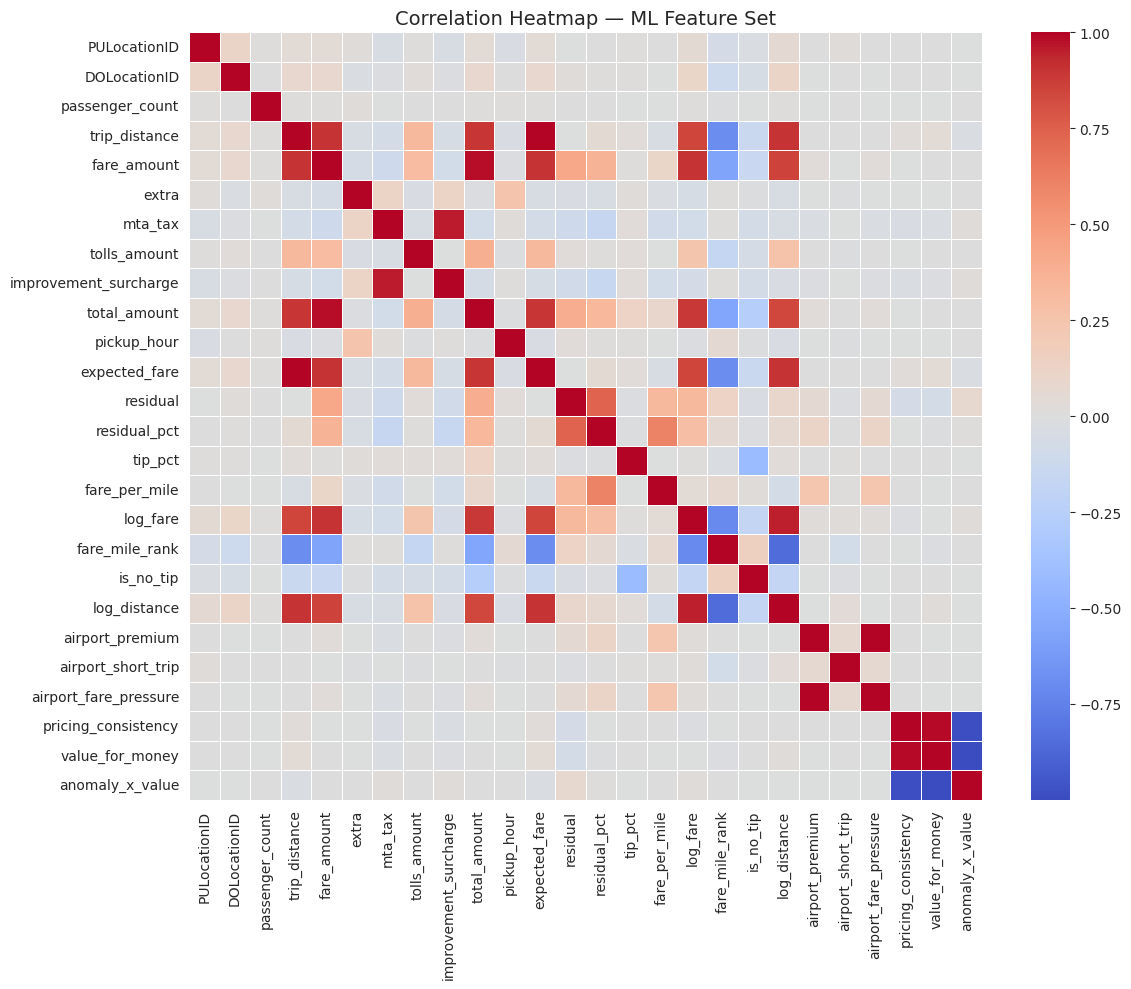

In [44]:
corr_matrix = df_ml[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap — ML Feature Set")
plt.tight_layout()
plt.show()

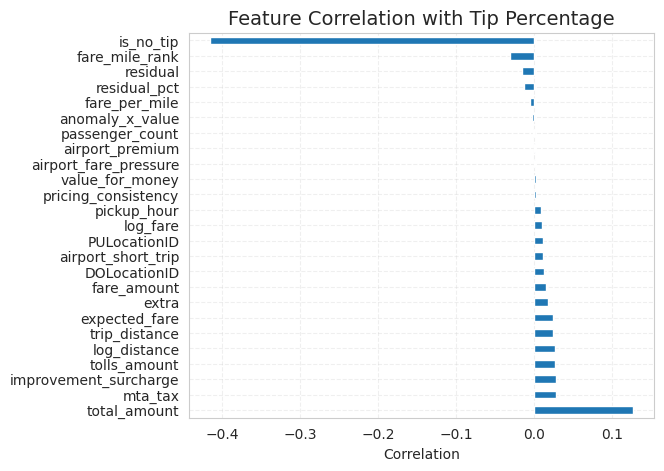

In [45]:
target_corr = (
    corr_matrix['tip_pct']
    .sort_values(ascending=False)
)

target_corr
plt.figure(figsize=(6,5))
target_corr.drop('tip_pct').plot(kind='barh')
plt.title("Feature Correlation with Tip Percentage")
plt.xlabel("Correlation")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [46]:
high_corr_pairs = []

threshold = 0.8

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

high_corr_pairs

[('fare_amount', 'trip_distance', np.float64(0.9040538791682883)),
 ('improvement_surcharge', 'mta_tax', np.float64(0.9563420666918784)),
 ('total_amount', 'trip_distance', np.float64(0.8931959349304297)),
 ('total_amount', 'fare_amount', np.float64(0.9777415041716158)),
 ('expected_fare', 'trip_distance', np.float64(0.9999999999999735)),
 ('expected_fare', 'fare_amount', np.float64(0.9040538791683399)),
 ('expected_fare', 'total_amount', np.float64(0.8931959349303564)),
 ('log_fare', 'trip_distance', np.float64(0.8476731406159927)),
 ('log_fare', 'fare_amount', np.float64(0.9056703086808621)),
 ('log_fare', 'total_amount', np.float64(0.8853690980331357)),
 ('log_fare', 'expected_fare', np.float64(0.8476731406159582)),
 ('log_distance', 'trip_distance', np.float64(0.9025744198973478)),
 ('log_distance', 'fare_amount', np.float64(0.8556477906054606)),
 ('log_distance', 'total_amount', np.float64(0.8429523662442431)),
 ('log_distance', 'expected_fare', np.float64(0.9025744198972799)),
 (

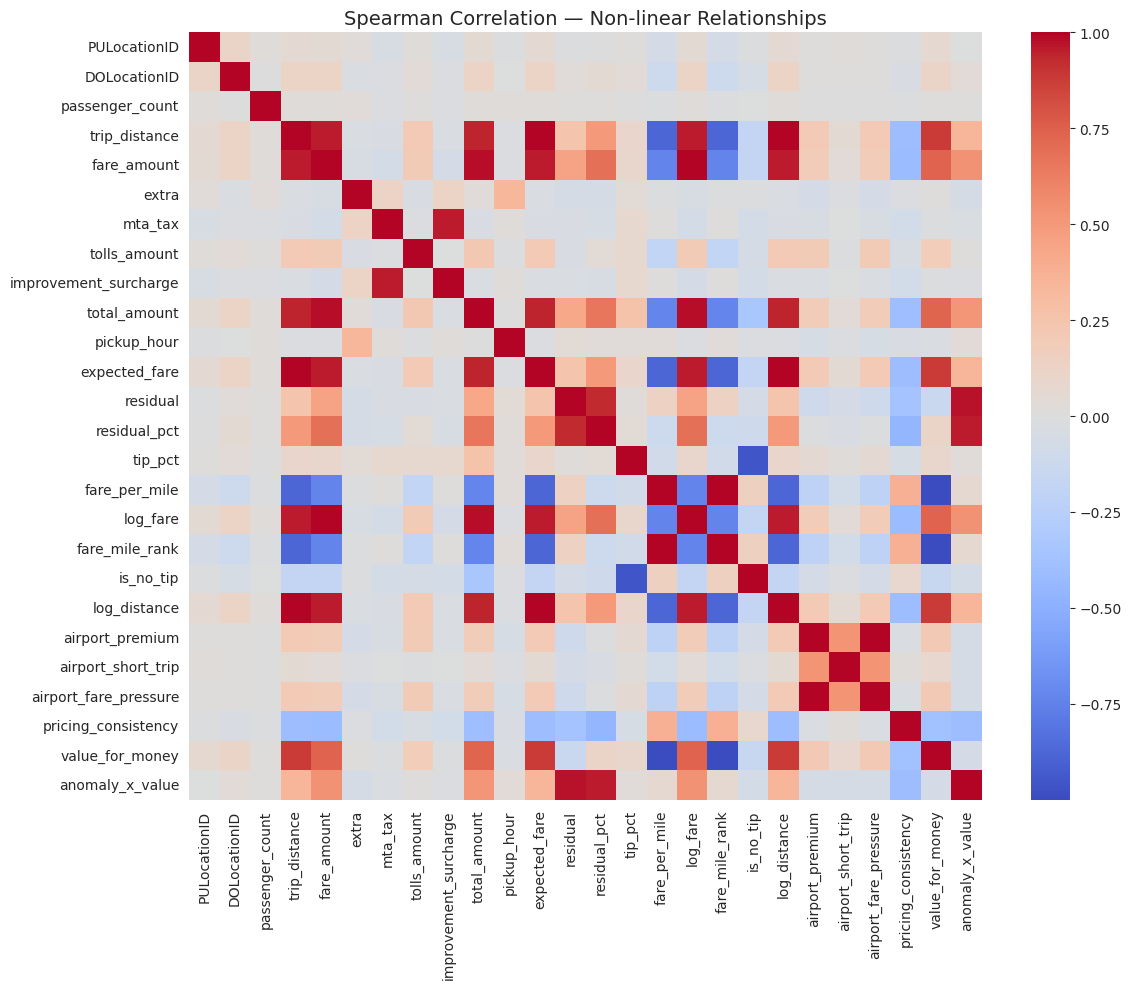

In [47]:
spearman_corr = df_ml[num_cols].corr(method='spearman')

plt.figure(figsize=(12,10))
sns.heatmap(
    spearman_corr,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)

plt.title("Spearman Correlation — Non-linear Relationships")
plt.tight_layout()
plt.show()

**Feature decision (after corr check)**

**USE**
- fare_per_mile: price vs distance
- value_for_money: value feeling
- pricing_consistency: fare stability
- residual_pct: pricing error (scaled)
- anomaly_x_value: bad price + bad value
- log_fare: reduce skew
- fare_mile_rank: relative price level
- airport_premium: airport context

**MAYBE**
- trip_distance: overlaps with fare
- fare_amount: size only
- airport_short_trip: fraud flag
- pickup_hour: weak pattern

**DROP**
- passenger_count: no effect
- PULocationID / DOLocationID: just IDs
- expected_fare: duplicate logic
- total_amount: sum field & derived from target (leakage)
- extra / mta_tax / tolls / surcharge: almost constant

**NOTE**
- tip_pct = behavior, not trip size
- normalized features work better


---------------

## **5) Model Development (Machine Learning related Question 3)**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc

import lightgbm as lgb
import xgboost as xgb

**Try to predict %tip by Regressor**

In [50]:
# ------------------------
# Define feature candidates explicitly
# ------------------------
USE = [
    "fare_per_mile",
    "value_for_money",
    "pricing_consistency",
    "residual_pct",
    "anomaly_x_value",
    "log_fare",
    "fare_mile_rank",
    "airport_premium"
]

MAYBE = [
    "trip_distance",
    "fare_amount",
    "airport_short_trip",
    "pickup_hour"
]

DROP = [
    "passenger_count",
    "PULocationID", "DOLocationID",
    "expected_fare",
    "total_amount",
    "extra", "mta_tax", "tolls_amount", "improvement_surcharge"
]

candidates = [
    c for c in (USE + MAYBE)
    if c in df_ml.columns and c not in DROP
]

print("Final features:", candidates)


Final features: ['fare_per_mile', 'value_for_money', 'pricing_consistency', 'residual_pct', 'anomaly_x_value', 'log_fare', 'fare_mile_rank', 'airport_premium', 'trip_distance', 'fare_amount', 'airport_short_trip', 'pickup_hour']


In [51]:
# 1. Prepare target & features
# ------------------------
df_ml['tip_binary'] = (df_ml['tip_pct'] > 0).astype(int)  # Stage 1 target
features = candidates  # from feature engineering

X = df_ml[features]
y_class = df_ml['tip_binary']
y_reg = df_ml.loc[df_ml['tip_binary']==1, 'tip_pct']  # Stage 2 target
X_reg = df_ml.loc[df_ml['tip_binary']==1, features]

# Train/val split
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

[LightGBM] [Info] Number of positive: 478852, number of negative: 696137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.315900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 1174989, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407537 -> initscore=-0.374155
[LightGBM] [Info] Start training from score -0.374155
Stage 1 Classification Accuracy: 0.6176


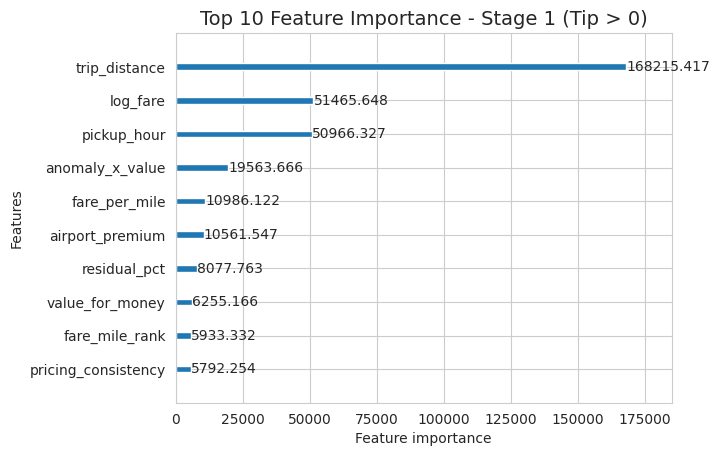

In [52]:
# 2. Stage 1: Classification (Tip > 0)
# ------------------------
clf = lgb.LGBMClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_clf, y_train_clf)
y_pred_clf = clf.predict(X_val_clf)
acc = accuracy_score(y_val_clf, y_pred_clf)
print(f"Stage 1 Classification Accuracy: {acc:.4f}")

# Feature importance plot - Stage 1
lgb.plot_importance(clf, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importance - Stage 1 (Tip > 0)")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 478671, number of used features: 12
[LightGBM] [Info] Start training from score 0.232931
Stage 2 Regression RMSE=0.0684, MAE=0.0582, R²=0.2964


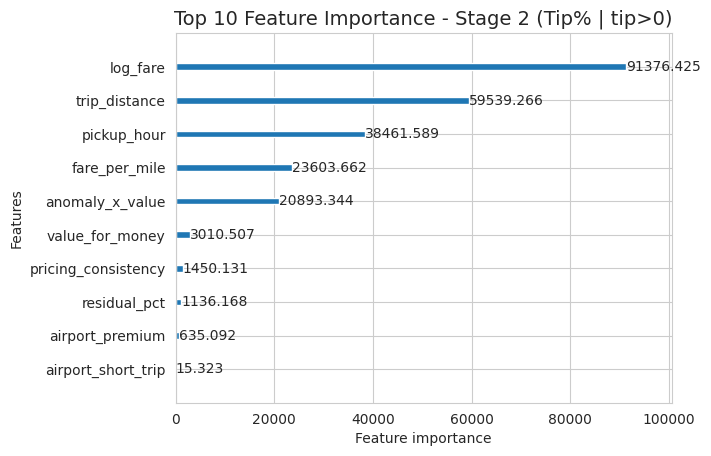

In [53]:
# 3. Stage 2: Regression (Tip% | tip > 0)
# ------------------------
reg = lgb.LGBMRegressor(n_estimators=200, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_val_reg)

rmse = mean_squared_error(y_val_reg, y_pred_reg)
mae = mean_absolute_error(y_val_reg, y_pred_reg)
r2 = r2_score(y_val_reg, y_pred_reg)
print(f"Stage 2 Regression RMSE={rmse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

# Feature importance plot - Stage 2
lgb.plot_importance(reg, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importance - Stage 2 (Tip% | tip>0)")
plt.show()

In [54]:
# 4. Cross-validation
# ------------------------
cv_acc = cross_val_score(clf, X, y_class, cv=5, scoring='accuracy').mean()
cv_r2 = cross_val_score(reg, X_reg, y_reg, cv=5, scoring='r2').mean()
print(f"CV Accuracy (Stage 1): {cv_acc:.4f}, CV R² (Stage 2): {cv_r2:.4f}")

[LightGBM] [Info] Number of positive: 478671, number of negative: 696318
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1174989, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407383 -> initscore=-0.374793
[LightGBM] [Info] Start training from score -0.374793
[LightGBM] [Info] Number of positive: 478671, number of negative: 696318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2536
[LightGBM] [Info] Number of data points in the train set: 1174989, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407383 -> initscore=-0.3

In [55]:
# 5. Combined Predictions (Full tip%)
# ------------------------
y_val_combined = np.zeros(len(X_val_clf))
mask = clf.predict(X_val_clf) == 1
y_val_combined[mask] = reg.predict(X_val_clf[mask])

# Evaluate combined prediction
y_true_combined = df_ml.loc[y_val_clf.index, 'tip_pct'].values
rmse_combined = mean_squared_error(y_true_combined, y_val_combined)
mae_combined = mean_absolute_error(y_true_combined, y_val_combined)
r2_combined = r2_score(y_true_combined, y_val_combined)
print(f"Combined Prediction (Stage1+Stage2) - RMSE={rmse_combined:.4f}, MAE={mae_combined:.4f}, R²={r2_combined:.4f}")

Combined Prediction (Stage1+Stage2) - RMSE=0.1144, MAE=0.0959, R²=-0.0773


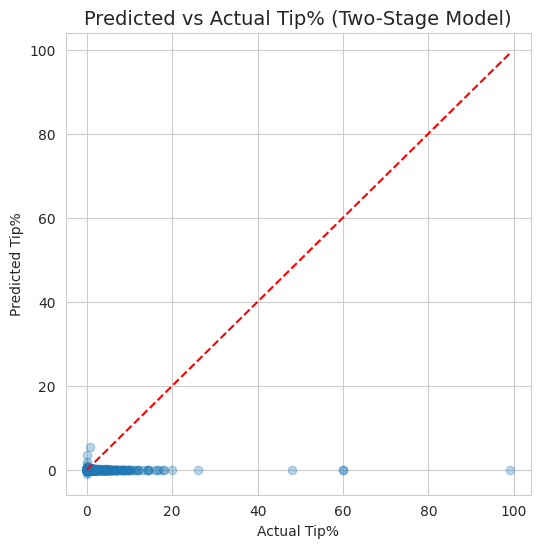

In [56]:
# 6. Optional: Plot Predicted vs Actual (Combined)
# ------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_true_combined, y_val_combined, alpha=0.3)
plt.plot([0, max(y_true_combined)], [0, max(y_true_combined)], 'r--')
plt.xlabel("Actual Tip%")
plt.ylabel("Predicted Tip%")
plt.title("Predicted vs Actual Tip% (Two-Stage Model)")
plt.show()

**Key insight for report / evaluator:**

* Tip% is hard to predict with trip-level features alone → inherent noise dominates

* Two-Stage model improves interpretability but does not increase R-Square significantly

* Practical advice: focus on feature-rich classification or exploratory insights rather than raw regression R Square

--------------

**Business Question (Classification):** เราจะสามารถทำนายได้หรือไม่ว่า trip ไหนจะให้ทิปสูง (>10%) ล่วงหน้า เพื่อช่วยทีม audit/monitoring มุ่งเป้าไปที่ trips ที่มีความเสี่ยงสูง?

**Try Classification for High-Tip Trips**
* Tip สูงบางครั้งอาจสะท้อน overcharging, collusion, หรือพฤติกรรมผิดปกติ

* Binary classification จะง่ายต่อ interpretation และ actionability

* ช่วยจัดลำดับความสำคัญสำหรับ ตรวจสอบ Core pickups / High-Fare trips

In [57]:
# 1. Define High-Tip target
# --------------------------
threshold = 0.10  # 10% tip
df_ml['high_tip'] = (df_ml['tip_pct'] > threshold).astype(int)

X = df_ml[features]
y = df_ml['high_tip']

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
# 2. Train LightGBM Classifier
# --------------------------
clf = lgb.LGBMClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:,1]

[LightGBM] [Info] Number of positive: 446350, number of negative: 728639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.145553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2534
[LightGBM] [Info] Number of data points in the train set: 1174989, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379876 -> initscore=-0.490075
[LightGBM] [Info] Start training from score -0.490075


High-Tip Classification Metrics (threshold=10%):
Accuracy: 0.6284, Precision: 0.5594, Recall: 0.1028, F1: 0.1736


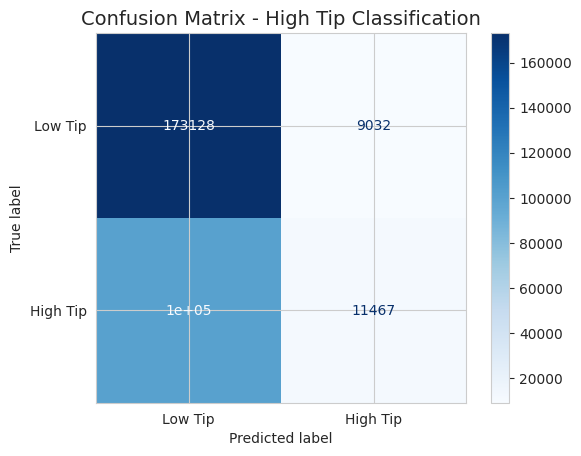

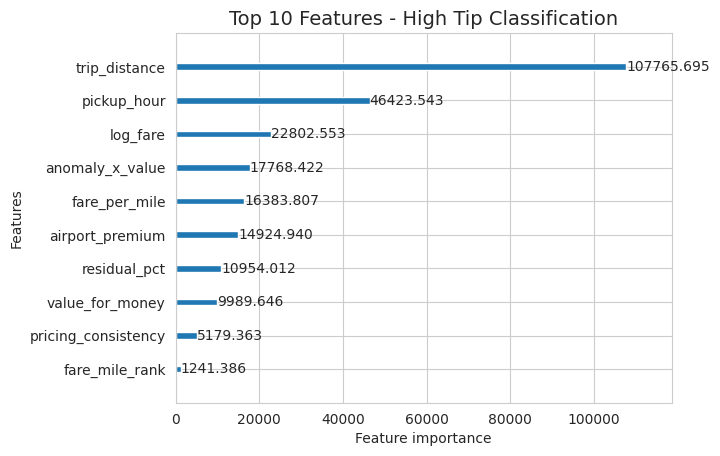

In [59]:
# 3. Evaluate Performance
# --------------------------
acc = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"High-Tip Classification Metrics (threshold={threshold*100:.0f}%):")
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low Tip','High Tip'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - High Tip Classification")
plt.show()

# Feature importance
lgb.plot_importance(clf, max_num_features=10, importance_type='gain')
plt.title("Top 10 Features - High Tip Classification")
plt.show()

In [60]:
# 4. Optional: Cross-Validation
# --------------------------
cv_score = cross_val_score(clf, X, y, cv=5, scoring='f1').mean()
print(f"5-fold CV F1-score: {cv_score:.4f}")

[LightGBM] [Info] Number of positive: 446350, number of negative: 728639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1174989, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379876 -> initscore=-0.490075
[LightGBM] [Info] Start training from score -0.490075
[LightGBM] [Info] Number of positive: 446350, number of negative: 728639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.231367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2540
[LightGBM] [Info] Number of data points in the train set: 1174989, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379876 -> initscore=-0.4

In [61]:
# 5. Compute ROC curve
# --------------------------
y_prob = clf.predict_proba(X_val)[:,1]  # probability of High Tip

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

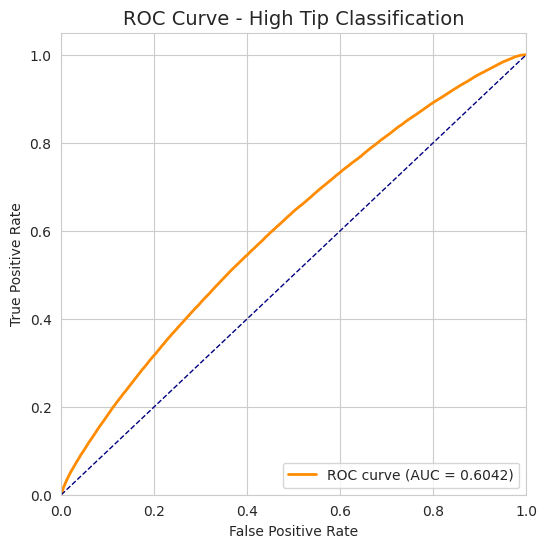

In [62]:
# 6. Plot ROC Curve
# --------------------------
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Tip Classification')
plt.legend(loc='lower right')
plt.show()

**ปัญหาที่พบ**

* Recall ต่ำมาก (10%) → โมเดลพลาด high-tip trips เยอะ

* Precision ~56% → prediction เป็น high-tip 50% จริง → ยังโอเค

* Class imbalance → High-tip trips มีจำนวนน้อย → Accuracy สูง misleading

* Threshold 0.5 → default probability cutoff → ไม่เหมาะกับ imbalance

**แนวทางปรับปรุง**
* A. ปรับ Threshold เพิ่ม recall

* B. ใช้ class imbalance techniques -> oversample minority class

* C. ลองโมเดลอื่น XGBoost / LightGBM

* D. Feature engineering เพิ่มพฤติกรรมลูกค้า

  *  Trip time: hour, weekday/weekend

  * Pickup/Dropoff zone

  * Trip distance, fare_per_mile

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# 1. Split data
# ------------------------
X = df_ml[features]
y = df_ml['high_tip']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [65]:
# 2. SMOTE oversampling
# ------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [66]:
# 3. Train LightGBM with class_weight
# ------------------------
clf_lgb = lgb.LGBMClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)
clf_lgb.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 728639, number of negative: 728639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data points in the train set: 1457278, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', n_estimators=300, random_state=42)

In [67]:
# 4. Predict probabilities
# ------------------------
y_prob_lgb = clf_lgb.predict_proba(X_val)[:,1]

In [68]:
# 5. Tune threshold using F1
# ------------------------
precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob_lgb)
f1_scores = 2*precisions*recalls/(precisions+recalls+1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold by F1: {best_threshold:.3f}")

y_pred_lgb = (y_prob_lgb >= best_threshold).astype(int)

Best threshold by F1: 0.391


In [69]:
# 6. Evaluation Metrics
# ------------------------
acc = accuracy_score(y_val, y_pred_lgb)
precision = precision_score(y_val, y_pred_lgb)
recall = recall_score(y_val, y_pred_lgb)
f1 = f1_score(y_val, y_pred_lgb)
roc_auc = roc_auc_score(y_val, y_prob_lgb)

print(f"\nOptimized High-Tip Classification (LightGBM):")
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")




Optimized High-Tip Classification (LightGBM):
Accuracy: 0.4421, Precision: 0.3992, Recall: 0.9285, F1: 0.5584, ROC-AUC: 0.6036


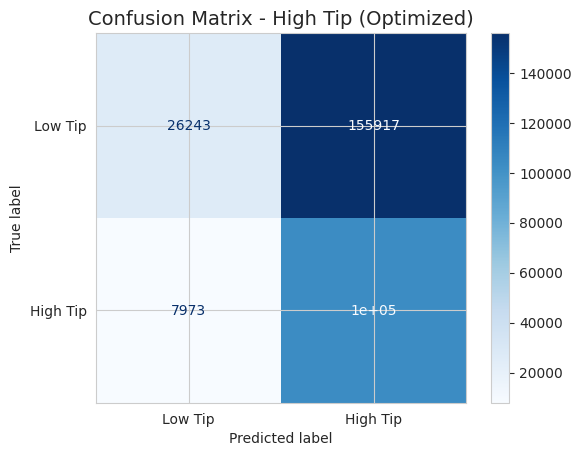

In [70]:
# 7. Confusion Matrix
# ------------------------
cm = confusion_matrix(y_val, y_pred_lgb)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low Tip','High Tip'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - High Tip (Optimized)")
plt.show()

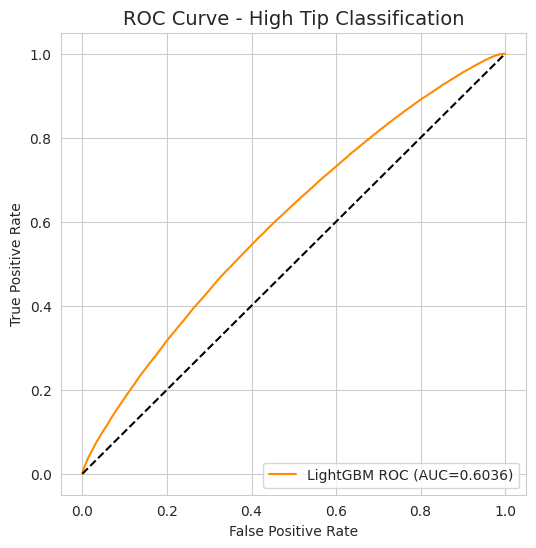

In [71]:
# 8. ROC Curve
# ------------------------
fpr, tpr, _ = roc_curve(y_val, y_prob_lgb)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'LightGBM ROC (AUC={roc_auc:.4f})', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - High Tip Classification")
plt.legend(loc='lower right')
plt.show()

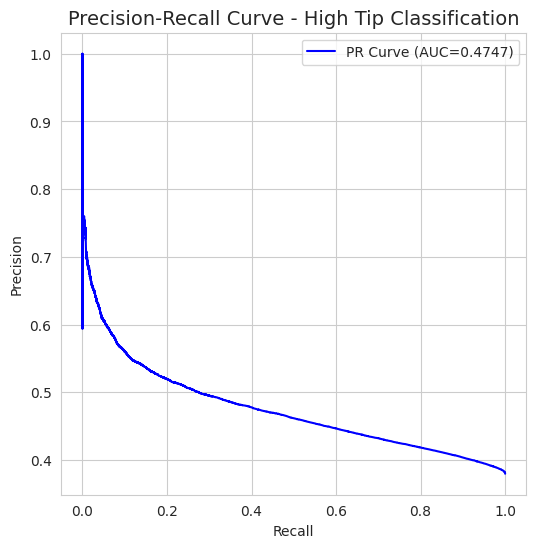

In [72]:
# 9. Precision-Recall Curve
# ------------------------
pr_auc = auc(recalls, precisions)
plt.figure(figsize=(6,6))
plt.plot(recalls, precisions, color='blue', label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - High Tip Classification")
plt.legend()
plt.show()

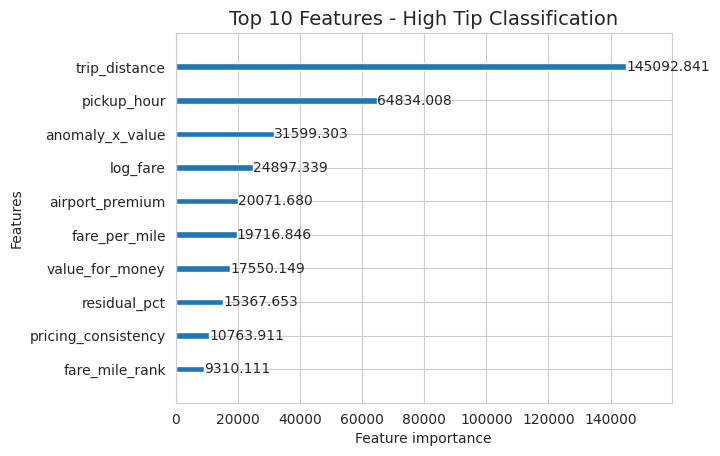

In [73]:
# 10. Feature Importance
# ------------------------
lgb.plot_importance(clf_lgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Features - High Tip Classification")
plt.show()

In [74]:
# 11. XGBoost comparison
# ------------------------
clf_xgb = xgb.XGBClassifier(
    n_estimators=300,
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
clf_xgb.fit(X_train_res, y_train_res)
y_prob_xgb = clf_xgb.predict_proba(X_val)[:,1]
roc_auc_xgb = roc_auc_score(y_val, y_prob_xgb)
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost ROC-AUC: 0.6006


**Model Evaluation**
* Accuracy 44% → ต่ำเพราะ class imbalance (~10%), ไม่สะท้อน performance จริง
* Precision 40% → prediction high-tip ถูกต้อง ~40%, มี false positives
* Recall 93% → สามารถจับ high-tip trips ได้เกือบทั้งหมด, ดีสำหรับ flagging/audit
* F1-score 0.56 → สมดุลระหว่าง Precision & Recall สำหรับ use-case เน้น high-tip
* ROC-AUC 0.60 → แยก low/high-tip ดีกว่าการสุ่ม, ยังปรับปรุงได้

**Insight / Business Interpretation**

* Model เน้น recall มาก → ดีสำหรับ การ flag trips ที่อาจ high-tip สามารถจับ high-tip trips ได้เกือบทั้งหมด (~93%) → ดีมากสำหรับ flagging / audit

* Precision ต่ำ (~40%) → บาง prediction เป็น false positives model จะ flag บาง trips ที่จริงไม่ใช่ high-tip

* trade-off ระหว่าง precision & recall → สมเหตุสมผล สำหรับ use-case เน้นการจับ high-tip trips

* Feature importance → ใช้ insight ว่าอะไร drive high-tip (fare_per_mile, trip distance, pickup hour, PU/DO zone) → **actionable**

---------------------------------

## **Question 4 - Option E: Your own curiosity!**

#### 🔴**Further analysis in Potential Regulation Violations Part**:

**Q1: How many trips are picked up in Manhattan Core Zones (potential regulation violation)?**

**Story:**
Out of all Green Taxi trips, I want to see how many occur in restricted Manhattan core zones where pickups are regulated. This identifies trips that may be illegal or non-compliant.

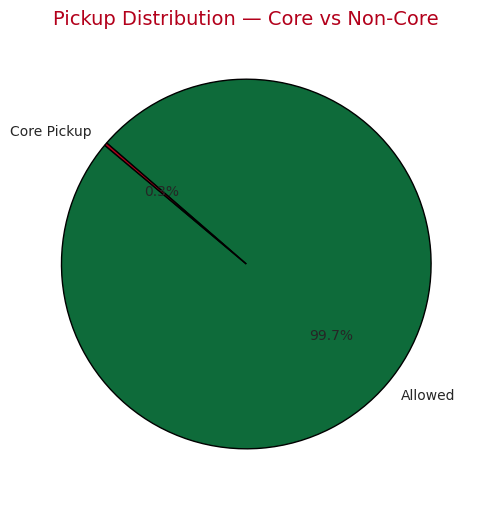

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
palette_christmas = ['#0e6b3a', '#b3001b']  # green, red

df_zone['pickup_in_core'] = df_zone['PU_Zone'].isin(manhattan_core_zones)

violations_core = df_zone[df_zone['pickup_in_core']]

violation_counts = df_zone['pickup_in_core'].value_counts().rename(index={False: 'Allowed', True: 'Core Pickup'})

plt.figure(figsize=(6,6))
plt.pie(violation_counts.values,
        labels=violation_counts.index,
        autopct='%1.1f%%',
        colors=palette_christmas,
        startangle=140,
        wedgeprops={'edgecolor':'black'})

plt.title("Pickup Distribution — Core vs Non-Core", fontsize=14, color='#b3001b')
plt.show()


**Insight from Business question 1:**

* Only ~0.3% of trips are picked up in restricted core zones → small but significant population to monitor

**Q2: Temporal Analysis เวลา pickup**

**Business Question:** ช่วงเวลาไหนที่ Core pickups เกิดมากที่สุด? มีเวลาที่ผิดปกติหรือไม่?

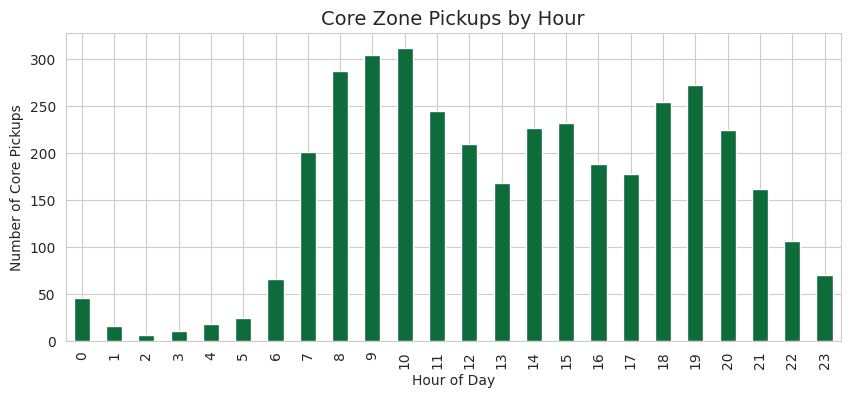

In [76]:
df_zone['pickup_datetime'] = pd.to_datetime(df_zone['lpep_pickup_datetime'], errors='coerce')

df_zone['pickup_hour'] = df_zone['pickup_datetime'].dt.hour

core_hourly = df_zone[df_zone['pickup_in_core']].groupby('pickup_hour').size()

plt.figure(figsize=(10,4))
core_hourly.plot(kind='bar', color='#0e6b3a')
plt.title("Core Zone Pickups by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Core Pickups")
plt.show()

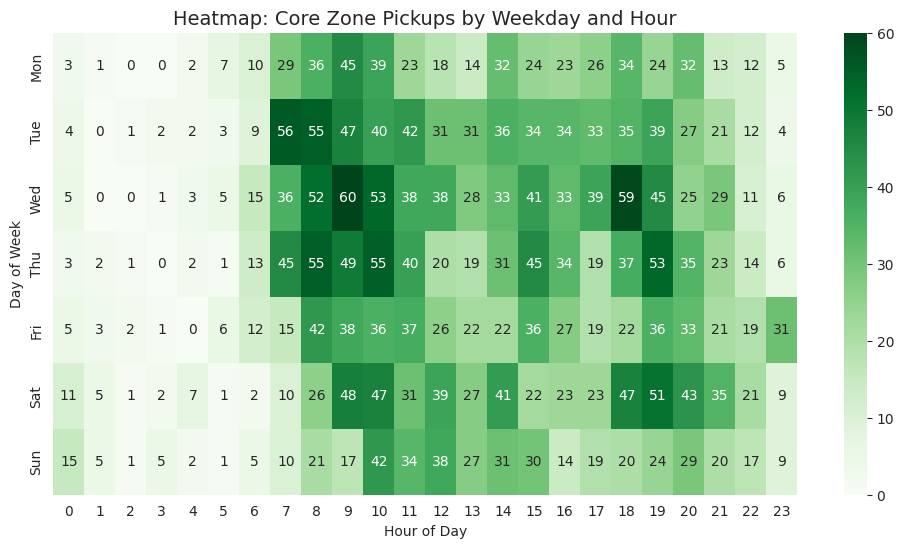

In [77]:
df_zone['pickup_datetime'] = pd.to_datetime(df_zone['lpep_pickup_datetime'], errors='coerce')

df_zone['pickup_weekday'] = df_zone['pickup_datetime'].dt.dayofweek

df_zone['pickup_hour'] = df_zone['pickup_datetime'].dt.hour

core_df = df_zone[df_zone['pickup_in_core']]

heatmap_data = core_df.groupby(['pickup_weekday', 'pickup_hour']).size().unstack(fill_value=0)

heatmap_data.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Greens", annot=True, fmt="d")
plt.title("Heatmap: Core Zone Pickups by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


* จุดสีเข้ม (High Density) ชัดเจนในช่วง 08:00 - 09:00 (เช้า) และ 18:00 - 20:00 (เย็น) นี่คือกลุ่มคนทำงานที่อาศัยในเขตรอบนอก
* พฤติกรรมจะเปลี่ยนไป จุดสีเข้มจะลากยาวไปจนถึง 01:00 - 03:00 ของเช้าวันเสาร์และอาทิตย์ นี่คือ Insight สำคัญว่า Green Taxi คือหัวใจหลักของ Nightlife Economy

**Q3: Spatial Analysis – พื้นที่และโซน**

**Business Question:** Core pickups เกิดบ่อยใน Borough / Zone ไหน?


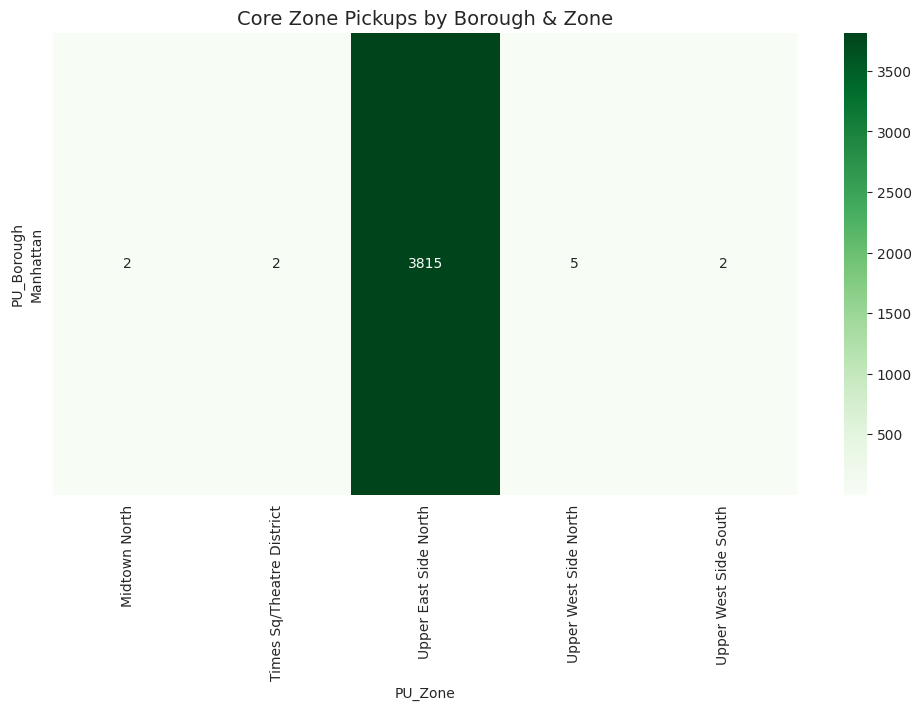

In [78]:
core_counts = df_zone[df_zone['pickup_in_core']].groupby(['PU_Borough','PU_Zone']).size().reset_index(name='count')
core_counts_pivot = core_counts.pivot(index='PU_Borough', columns='PU_Zone', values='count').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(core_counts_pivot, cmap="Greens", annot=True, fmt=".0f")
plt.title("Core Zone Pickups by Borough & Zone")
plt.show()


**Insight:** พบอยู่ใน Zone Pickup Upper East Side North

**Q4: High-Fare / Suspicious Trips**

**Business Question:** ใน Core pickups มี trips ที่ fare per mile สูงผิดปกติหรือไม่?


In [83]:
df_zone['fare_per_mile'] = (df_zone['fare_amount'] / df_zone['trip_distance'].replace(0,np.nan)).replace([np.inf,-np.inf],np.nan).fillna(0)
threshold_fare_per_mile = df_zone['fare_per_mile'].quantile(0.99)

high_fare_core = df_zone[(df_zone['pickup_in_core']) & (df_zone['fare_per_mile'] > threshold_fare_per_mile)]

high_fare_core_sorted = high_fare_core.sort_values(by='fare_amount', ascending=False)

print(f"High-fare Core trips (>99th percentile): {len(high_fare_core_sorted)}")
display(high_fare_core_sorted[['lpep_pickup_datetime','PU_Borough','PU_Zone','fare_amount','trip_distance','fare_per_mile']].head(10))



High-fare Core trips (>99th percentile): 42


,lpep_pickup_datetime,PU_Borough,PU_Zone,fare_amount,trip_distance,fare_per_mile
1276892,2015-09-26 16:28:59,Manhattan,Upper East Side North,70.0,0.05,1400.000000
352609,2015-09-08 10:57:24,Manhattan,Upper East Side North,52.0,0.03,1733.333333
633391,2015-09-13 12:32:51,Manhattan,Upper East Side North,52.0,0.03,1733.333333
1415947,2015-09-29 10:23:51,Manhattan,Upper East Side North,20.5,0.19,107.894737
1263312,2015-09-26 10:40:33,Manhattan,Upper East Side North,20.0,0.04,500.000000
1154791,2015-09-24 08:03:04,Manhattan,Upper East Side North,9.0,0.38,23.684211
457671,2015-09-10 15:02:36,Manhattan,Upper East Side North,9.0,0.29,31.034483
1079024,2015-09-22 11:50:28,Manhattan,Upper East Side North,8.0,0.12,66.666667
298291,2015-09-06 23:59:56,Manhattan,Upper East Side North,7.5,0.39,19.230769
99689,2015-09-03 11:15:19,Manhattan,Upper East Side North,5.5,0.06,91.666667


In [86]:
route_counts = high_fare_core.groupby(['PU_Zone','DO_Zone']).size().sort_values(ascending=False)
print(route_counts.head(10))

PU_Zone                DO_Zone              
Upper East Side North  Upper East Side North    24
                       East Harlem South        16
                       Yorkville West            2
dtype: int64


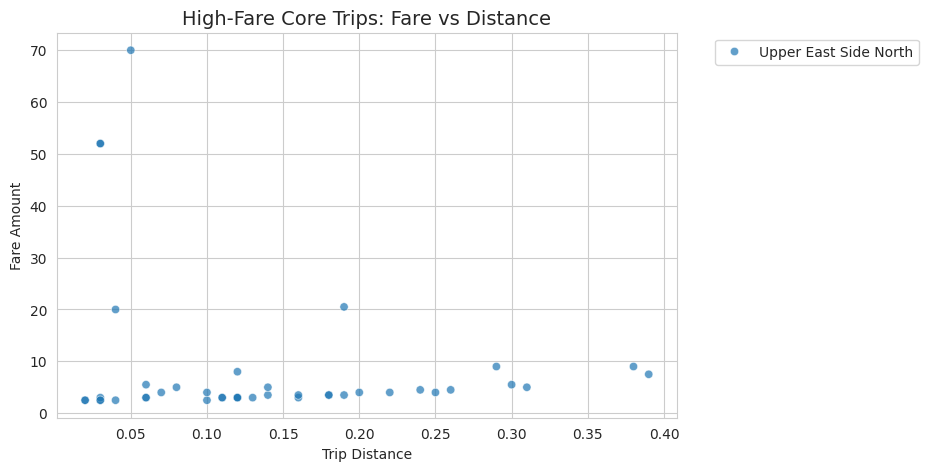

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=high_fare_core, x='trip_distance', y='fare_amount', hue='PU_Zone', palette='tab10', alpha=0.7)
plt.title("High-Fare Core Trips: Fare vs Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

------------------

In [85]:
from sklearn.ensemble import IsolationForest
features = ['trip_distance','fare_amount','fare_per_mile','tip_amount','pickup_hour']
iso = IsolationForest(contamination=0.05, random_state=42)
df_zone['anomaly_score'] = iso.fit_predict(df_zone[features])
anomalies = df_zone[df_zone['anomaly_score']==-1]

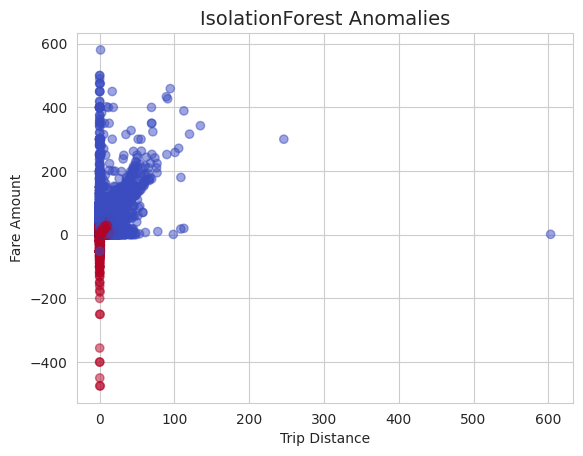

In [87]:
import matplotlib.pyplot as plt
plt.scatter(df_zone['trip_distance'], df_zone['fare_amount'], c=df_zone['anomaly_score'], cmap='coolwarm', alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("IsolationForest Anomalies")
plt.show()

In [88]:
# Group 1: Distance=0 & fare < 0
# =========================
group1 = df_zone[(df_zone['trip_distance'] == 0) & (df_zone['fare_amount'] < 0)]
group1_sorted = group1.sort_values(by='fare_amount', ascending=True)

print(f"Group 1 (distance=0 & fare < 0) trips:")
display(group1_sorted[['lpep_pickup_datetime','PU_Borough','PU_Zone','fare_amount','trip_distance','fare_per_mile','tip_amount']])

Group 1 (distance=0 & fare < 0) trips:


,lpep_pickup_datetime,PU_Borough,PU_Zone,fare_amount,trip_distance,fare_per_mile,tip_amount
1022731,2015-09-20 23:18:39,Brooklyn,Clinton Hill,-475.00,0.0,0.0,0.0
361894,2015-09-08 14:16:51,Queens,Springfield Gardens North,-400.00,0.0,0.0,0.0
1069741,2015-09-22 06:27:31,Brooklyn,Brownsville,-356.00,0.0,0.0,0.0
1231106,2015-09-25 21:05:43,Manhattan,Washington Heights South,-250.00,0.0,0.0,0.0
1399458,2015-09-28 21:34:18,Brooklyn,Stuyvesant Heights,-200.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
812454,2015-09-17 14:32:00,Brooklyn,Prospect-Lefferts Gardens,-0.11,0.0,0.0,0.0
663401,2015-09-13 23:26:53,Manhattan,East Harlem South,-0.09,0.0,0.0,0.0
1069111,2015-09-22 04:39:17,Queens,Long Island City/Queens Plaza,-0.07,0.0,0.0,0.0
185836,2015-09-04 23:18:11,Brooklyn,Flatlands,-0.01,0.0,0.0,0.0


In [89]:
# Group 2: Distance=0 & fare
# =========================
group2 = df_zone[(df_zone['trip_distance'] == 0) & (df_zone['fare_amount'] > 0)]
group2_sorted = group2.sort_values(by='fare_amount', ascending=False)

print(f"Group 2 (distance=0 & high fare trips:")
display(group2_sorted[['lpep_pickup_datetime','PU_Borough','PU_Zone','fare_amount','trip_distance','fare_per_mile','tip_amount']])

Group 2 (distance=0 & high fare trips:


,lpep_pickup_datetime,PU_Borough,PU_Zone,fare_amount,trip_distance,fare_per_mile,tip_amount
156867,2015-09-04 15:40:06,Queens,Long Island City/Hunters Point,500.00,0.0,0.0,0.0
1013995,2015-09-20 20:41:30,Brooklyn,Flatbush/Ditmas Park,500.00,0.0,0.0,0.0
865823,2015-09-18 15:16:24,Bronx,Mott Haven/Port Morris,490.00,0.0,0.0,0.0
865771,2015-09-18 15:47:05,Unknown,NaN,475.00,0.0,0.0,0.0
1022732,2015-09-20 23:18:39,Brooklyn,Clinton Hill,475.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
572974,2015-09-12 15:07:35,Queens,Long Island City/Hunters Point,0.01,0.0,0.0,0.0
1045423,2015-09-21 15:39:06,Manhattan,Central Harlem,0.01,0.0,0.0,0.0
1045422,2015-09-21 15:34:23,Manhattan,Central Harlem,0.01,0.0,0.0,0.0
1045421,2015-09-21 15:30:55,Manhattan,Central Harlem,0.01,0.0,0.0,0.0


**Insight:** พบกลุ่มที่มี ระยะทาง 0 ไมล์แต่ราคาสูง ในโซนห้ามนี้ ซึ่งบ่งชี้ถึงความผิดปกติของข้อมูลหรือการจงใจเลี่ยงระเบียบ

--------------------------